# FINAL PROJECT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Load clean data
rates = pd.read_csv('inputs/Clean_Data/Clean_Rates.csv')
sp500_ret = pd.read_csv('inputs/Clean_Data/Clean_sp500_ret.csv')
stock_tv = pd.read_csv('inputs/Clean_Data/Clean_stock_tv.csv')
Vbilx = pd.read_csv('inputs/Clean_Data/Clean_Vbilx.csv')
Vbirx= pd.read_csv('inputs/Clean_Data/Clean_Vbirx.csv')

In [3]:
sp500_ret = sp500_ret.rename(columns = {'date': 'Date'})

In [4]:
Vbirx

,Daily Returns,Daily Price,Date
0,0.000000,9.148485,2015-01-02
1,0.000954,9.157212,2015-01-05
2,0.000952,9.165927,2015-01-06
3,0.000951,9.174645,2015-01-07
4,-0.000950,9.165927,2015-01-08
...,...,...,...
2086,0.000000,9.990000,2023-04-18
2087,-0.001001,9.980000,2023-04-19
2088,0.002004,10.000000,2023-04-20
2089,0.000000,10.000000,2023-04-21


In [5]:
Vbilx

,Daily Returns,Daily Price,Date
0,0.004348,9.135239,2015-01-05
1,0.004330,9.174790,2015-01-06
2,0.000000,9.174790,2015-01-07
3,-0.002586,9.151061,2015-01-08
4,0.003457,9.182695,2015-01-09
...,...,...,...
2085,0.001938,10.340000,2023-04-18
2086,-0.001934,10.320000,2023-04-19
2087,0.003876,10.360000,2023-04-20
2088,-0.001930,10.340000,2023-04-21


In [6]:
sp500_ret

,Date,S&P_500,returns
0,2015-01-05,2020.58,-0.018278
1,2015-01-06,2002.61,-0.008893
2,2015-01-07,2025.90,0.011630
3,2015-01-08,2062.14,0.017888
4,2015-01-09,2044.81,-0.008404
...,...,...,...
2085,2023-04-18,4154.87,0.000855
2086,2023-04-19,4154.52,-0.000084
2087,2023-04-20,4129.79,-0.005953
2088,2023-04-21,4133.52,0.000903


In [7]:
stock_tv
stock_tv.drop_duplicates(inplace=True)
stock_tv

,Date,Value
0,12/2/15,1088000.0
1,12/3/15,1379000.0
2,12/4/15,1308000.0
3,12/7/15,712744.0
4,12/8/15,670998.0
...,...,...
502,3/31/23,3293000.0
503,4/3/23,2494000.0
504,4/4/23,2687000.0
505,4/5/23,2311000.0


## Merging data 

In [8]:
Vbilx =Vbilx.reset_index()

In [9]:
for index, row in tqdm(rates.iterrows()):
    try:
        filing_index = Vbilx.loc[(Vbilx['Date'] == row['Date'])].index[0]
        forward_returns = Vbilx.loc[filing_index:filing_index+15, 'Daily Returns']
        negative_returns = Vbilx.loc[filing_index-15:filing_index, 'Daily Returns']
        forward_returns = forward_returns +1
        negative_returns = negative_returns +1
        forward_returns = forward_returns.cumprod()
        negative_returns = negative_returns.cumprod()
        forward_returns = forward_returns.to_list()
        negative_returns = negative_returns.to_list()
        forward_cumret = forward_returns[2]
        negative_cumret = negative_returns[2]
        forward_cumret = forward_cumret -1
        negative_cumret = negative_cumret -1
        rates.loc[index, 'Vbilx: T-T+15'] = forward_cumret
        rates.loc[index, 'Vbilx: T-15-T'] = negative_cumret
    except IndexError:
        pass

23it [00:00, 1189.13it/s]


In [10]:
for index, row in tqdm(rates.iterrows()):
    try:
        filing_index = Vbirx.loc[(Vbirx['Date'] == row['Date'])].index[0]
        forward_returns = Vbirx.loc[filing_index:filing_index+15, 'Daily Returns']
        negative_returns = Vbirx.loc[filing_index-15:filing_index, 'Daily Returns']
        forward_returns = forward_returns +1
        negative_returns = negative_returns +1
        forward_returns = forward_returns.cumprod()
        negative_returns = negative_returns.cumprod()
        forward_returns = forward_returns.to_list()
        negative_returns = negative_returns.to_list()
        forward_cumret = forward_returns[2]
        negative_cumret = negative_returns[2]
        forward_cumret = forward_cumret -1
        negative_cumret = negative_cumret -1
        rates.loc[index, 'Vbirx: T-T+15'] = forward_cumret
        rates.loc[index, 'Vbirx: T-15-T'] = negative_cumret
    except IndexError:
        pass

23it [00:00, 1553.52it/s]


In [11]:
for index, row in tqdm(rates.iterrows()):
    try:
        filing_index = stock_tv.loc[(stock_tv['Date'] == row['Date'])].index[0]
        forward_returns = stock_tv.loc[filing_index:filing_index+15, 'Daily Returns']
        negative_returns = stock_tv.loc[filing_index-15:filing_index, 'Daily Returns']
        forward_returns = forward_returns +1
        negative_returns = negative_returns +1
        forward_returns = forward_returns.cumprod()
        negative_returns = negative_returns.cumprod()
        forward_returns = forward_returns.to_list()
        negative_returns = negative_returns.to_list()
        forward_cumret = forward_returns[2]
        negative_cumret = negative_returns[2]
        forward_cumret = forward_cumret -1
        negative_cumret = negative_cumret -1
        rates.loc[index, 'SP500 Volume: T-T+15'] = forward_cumret
        rates.loc[index, 'SP500 Volume: T-15-T'] = negative_cumret
    except IndexError:
        pass

23it [00:00, 5038.33it/s]


In [12]:
for index, row in tqdm(rates.iterrows()):
    try:
        filing_index = sp500_ret.loc[(sp500_ret['Date'] == row['Date'])].index[0]
        forward_returns = sp500_ret.loc[filing_index:filing_index+15, 'returns']
        negative_returns = sp500_ret.loc[filing_index-15:filing_index, 'returns']
        forward_returns = forward_returns +1
        negative_returns = negative_returns +1
        forward_returns = forward_returns.cumprod()
        negative_returns = negative_returns.cumprod()
        forward_returns = forward_returns.to_list()
        negative_returns = negative_returns.to_list()
        forward_cumret = forward_returns[2]
        negative_cumret = negative_returns[2]
        forward_cumret = forward_cumret -1
        negative_cumret = negative_cumret -1
        rates.loc[index, 'SP500: T-T+15'] = forward_cumret
        rates.loc[index, 'SP500: T-15-T'] = negative_cumret
    except IndexError:
        pass

23it [00:00, 1690.72it/s]


In [13]:
rates

,Date,Increase,Decrease,Tgt_level,Vbilx: T-T+15,Vbilx: T-15-T,Vbirx: T-T+15,Vbirx: T-15-T,SP500: T-T+15,SP500: T-15-T
0,2015-12-17,25.0,0.0,0.25.0.50,0.005319,0.003080,1.915571e-03,2.006589e-03,-0.025045,-0.004179
1,2016-12-15,25.0,0.0,0.50.0.75,0.002682,0.000000,9.624116e-04,0.000000e+00,0.004105,-0.000554
2,2017-03-16,25.0,0.0,0.75.1.00,0.002671,0.002655,9.595560e-04,9.566719e-04,-0.004943,0.002933
3,2017-06-15,25.0,0.0,1.00.1.25,-0.003469,0.002628,-9.538335e-04,9.556173e-04,0.006374,0.007255
4,2017-12-14,25.0,0.0,1.25.1.50,-0.002629,0.002634,-9.614827e-04,9.613580e-04,0.010256,0.000920
5,2018-03-22,25.0,0.0,1.50.1.75,0.000910,-0.001813,2.220446e-16,0.000000e+00,-0.019683,0.002620
6,2018-06-14,25.0,0.0,1.75.2.00,0.002755,0.008294,9.788687e-04,3.917455e-03,-0.000677,-0.001142
7,2018-09-27,25.0,0.0,2.00.2.25,0.001472,-0.001823,7.841429e-04,-9.753952e-04,0.006407,-0.003971
8,2018-12-20,25.0,0.0,2.25.2.50,0.000911,0.004348,1.946940e-03,1.862446e-03,-0.062171,0.029081
9,2019-08-01,0.0,25.0,2.00.2.25,0.015385,-0.001714,6.648339e-03,2.220446e-16,-0.045511,0.007093


In [14]:
rates.to_csv('inputs/Final_Data/Final_Dataset.csv', index=True)

In [15]:
# Set date column as index in each dataset
Vbilx.set_index('Date', inplace=True)
Vbirx.set_index('Date', inplace=True)
sp500_ret.set_index('Date', inplace=True)

# Merge datasets 
merged_data = pd.concat([Vbilx['Daily Price'],Vbilx['Daily Returns'], Vbirx['Daily Price'], Vbirx['Daily Returns'], sp500_ret['S&P_500']], axis=1, keys=['VBILX Price','VBILX Returns', 'VBIRX Price', 'VBIRX Returns', 'S&P 500'])
merged_data.reset_index(inplace=True)
merged_data = merged_data.rename(columns={'index':'Date'})

In [16]:
merged_data.head()

,Date,VBILX Price,VBILX Returns,VBIRX Price,VBIRX Returns,S&P 500
0,2015-01-05,9.135239,0.004348,9.157212,0.000954,2020.58
1,2015-01-06,9.174790,0.004330,9.165927,0.000952,2002.61
2,2015-01-07,9.174790,0.000000,9.174645,0.000951,2025.90
3,2015-01-08,9.151061,-0.002586,9.165927,-0.000950,2062.14
4,2015-01-09,9.182695,0.003457,9.183371,0.001903,2044.81


## Merge for FOMC Meeting days

In [17]:
filtered_dates = rates['Date'].tolist()
merged_data_filtered = merged_data[merged_data['Date'].isin(filtered_dates)]

In [18]:
Data_with_rates = pd.merge(merged_data_filtered, rates, on='Date', how='left')

In [19]:
Data_with_rates  = Data_with_rates .rename(columns={'Increase': 'rates increase', 'Decrease': 'rates decrease', 'Tgt_level': 'rates Tgt_level'})
Data_with_rates.head()

,Date,VBILX Price,VBILX Returns,VBIRX Price,VBIRX Returns,S&P 500,rates increase,rates decrease,rates Tgt_level,Vbilx: T-T+15,Vbilx: T-15-T,Vbirx: T-T+15,Vbirx: T-15-T,SP500: T-T+15,SP500: T-15-T
0,2015-12-17,9.178917,0.003546,9.217266,0.000000,2041.89,25.0,0.0,0.25.0.50,0.005319,0.003080,0.001916,0.002007,-0.025045,-0.004179
1,2016-12-15,9.314666,-0.002681,9.303720,-0.000962,2262.03,25.0,0.0,0.50.0.75,0.002682,0.000000,0.000962,0.000000,0.004105,-0.000554
2,2017-03-16,9.455318,-0.001781,9.369161,-0.000960,2381.38,25.0,0.0,0.75.1.00,0.002671,0.002655,0.000960,0.000957,-0.004943,0.002933
3,2017-06-15,9.772591,-0.001734,9.448400,-0.000954,2432.46,25.0,0.0,1.00.1.25,-0.003469,0.002628,-0.000954,0.000956,0.006374,0.007255
4,2017-12-14,9.808608,-0.000877,9.456399,-0.000961,2652.01,25.0,0.0,1.25.1.50,-0.002629,0.002634,-0.000961,0.000961,0.010256,0.000920


## Correlation matrix 

/var/folders/_c/n4fjhrcn45bfs76s3p_8hn2c0000gn/T/ipykernel_39240/3694812839.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Data_with_rates.corr()


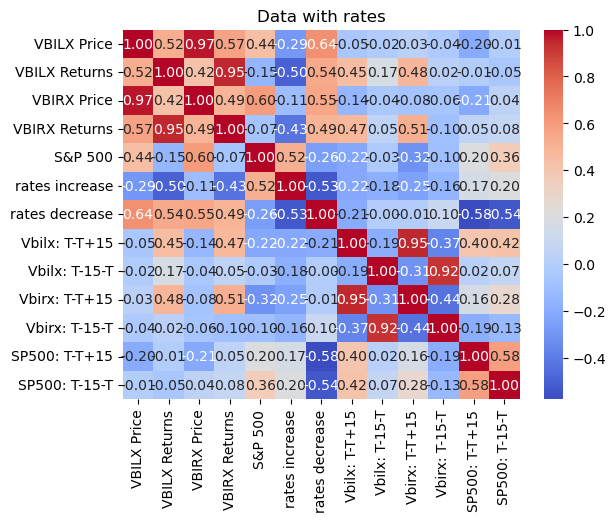

In [20]:
corr_matrix = Data_with_rates.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Data with rates')
plt.show()

## T+15 / T-15 FOMC Meetings

In [22]:
#change to datetime
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
rates['Date'] = pd.to_datetime(rates['Date'])

fifteen_days = pd.DataFrame()
filtered_dates = rates['Date'].tolist()


# Loop 
for date in filtered_dates:
    # Convert date to datetime object
    match_date = pd.to_datetime(date)
    # Filter the merged data to the 15 days prior and after the matching date
    prior_15 = merged_data.loc[(merged_data['Date'] >= match_date - pd.Timedelta(days=15)) & (merged_data['Date'] <= match_date)]
    post_15 = merged_data.loc[(merged_data['Date'] > match_date) & (merged_data['Date'] <= match_date + pd.Timedelta(days=15))]
    # Combine the filtered dataframes and append to the results dataframe
    filtered_data = pd.concat([prior_15, post_15])
    fifteen_days = pd.concat([fifteen_days, filtered_data])

# Sort results and drop and duplicates
fifteen_days.sort_values(by='Date', inplace=True)
fifteen_days.drop_duplicates(inplace=True)
fifteen_days.head()

,Date,VBILX Price,VBILX Returns,VBIRX Price,VBIRX Returns,S&P 500
230,2015-12-02,9.251890,-0.001750,9.252576,-0.000953,2079.51
231,2015-12-03,9.178917,-0.007887,9.234922,-0.001908,2049.62
232,2015-12-04,9.195134,0.001767,9.234922,0.000000,2091.69
233,2015-12-07,9.219458,0.002645,9.243748,0.000956,2077.07
234,2015-12-08,9.219458,0.000000,9.243748,0.000000,2063.59


#### NOTE: the date is not exact because there is no data for some days. for example 2015-12-12 and 2015-12-13 are not in the data. I just think it's important to note that! 

### Data Sources

- FOMC Rates 
        Source:https://www.federalreserve.gov/monetarypolicy/openmarket.htm
        
- Index Returns
    Source: https://www.spglobal.com/spdji/en/indices/equity/sp-500/#overview
    
- Stock Trading Volume¶
  Source: https://ycharts.com/indicators/cboe_spx_volume
  
- VBLAX data 
    Source: Yahoo Finance (import yfinance as yf)
    
- VBIRX data 
    Source: Yahoo Finance (import yfinance as yf)